In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import wbdata
import matplotlib.pyplot as plt

In [2]:
def c_names_as_index(df, cn):
    df.index = df.loc[:, cn].apply(lambda x: x.lower())
    df.drop([cn], axis=1, inplace=True)
    return df

In [27]:
freedom_house73_21_ctr = pd.read_csv('./raw_data/Country_and_Territory_Ratings_and_Statuses_FIW1973-2021.csv', sep=';')

In [28]:
freedom_house73_21_ctr.iloc[0,0] = np.nan
freedom_house73_21_ctr.iloc[0].replace(np.nan, None, inplace=True)
freedom_house73_21_ctr.columns = pd.MultiIndex.from_tuples(list(zip(freedom_house73_21_ctr.iloc[0], freedom_house73_21_ctr.iloc[1])))
freedom_house73_21_ctr.drop([0,1], inplace=True)
freedom_house73_21_ctr = freedom_house73_21_ctr[freedom_house73_21_ctr.iloc[:, 0].notna()]
freedom_house73_21_ctr.index = freedom_house73_21_ctr.loc[:, freedom_house73_21_ctr.columns[0]].apply(lambda x: x.lower())
freedom_house73_21_ctr.drop(freedom_house73_21_ctr.columns[0], axis=1, inplace=True)
freedom_house73_21_ctr = freedom_house73_21_ctr.replace('-', np.nan)

In [3]:
y_list = [int(i.split('.')[-1].strip()) for i in freedom_house73_21_ctr.columns.get_level_values(0).unique()]
_df = pd.DataFrame(columns=[i.strip() for i in list(freedom_house73_21_ctr.columns.get_level_values(1)[:3])], index=pd.MultiIndex.from_tuples(list(zip(np.repeat(freedom_house73_21_ctr.index, len(y_list)), y_list * len(y_list)))))
for i in freedom_house73_21_ctr.index:
   for j in freedom_house73_21_ctr.columns.get_level_values(0).unique():
        _df.loc[(i, int(j.split('.')[-1].strip())), :] = [*list(freedom_house73_21_ctr.loc[i, j])]
freedom_house73_21_ctr = _df
freedom_house73_21_ctr.index.names = ['country', 'year']

In [121]:
freedom_house73_21_ctr.head()

PR CL Status
country     year             
afghanistan 1972  4  5     PF
            1973  7  6     NF
            1974  7  6     NF
            1975  7  6     NF
            1976  7  6     NF

In [127]:
freedom_house73_21_ctr = freedom_house73_21_ctr.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

PR   CL
country     year          
afghanistan 1972  4.0  5.0
            1973  7.0  6.0
            1974  7.0  6.0
            1975  7.0  6.0
            1976  7.0  6.0
...               ...  ...
zimbabwe    2016  5.0  5.0
            2017  6.0  5.0
            2018  5.0  5.0
            2019  5.0  5.0
            2020  6.0  5.0

[9840 rows x 2 columns]

In [6]:
continent = c_names_as_index(pd.read_csv('./raw_data/Aggregate_Category_and_Subcategory_Scores_FIW_2003-2021_a.csv', sep=';', skiprows=1), 'Abkhazia')
continent = continent.drop(continent.columns[1:], axis=1)
continent.loc[:, 'continent cat'] = continent.Eurasia.astype('category').cat.codes
continent.index = continent.index.rename('country')

In [7]:
continent

,Eurasia,continent cat
country,,
afghanistan,Asia,1
albania,Europe,3
algeria,MENA,4
andorra,Europe,3
angola,SSA,5
...,...,...
vietnam,Asia,1
western sahara,MENA,4
yemen,MENA,4


In [ ]:
bjorskov_integrated = c_names_as_index(pd.read_csv('./raw_data/Bjørnskov-Rode-integrated-dataset-v3.2.csv', sep=';'), 'country')
bjorskov_integrated.index = pd.MultiIndex.from_tuples(list(zip(
    bjorskov_integrated.index,
    bjorskov_integrated.year.astype('int')
)))
bjorskov_integrated.drop(['country isocode', 'year'] + [i for i in bjorskov_integrated if 'Unnamed' in i], axis=1, inplace=True)
bjorskov_integrated.index.names = ['country', 'year']

In [7]:
bjorskov_integrated.head()

DD regime         DD category  Monarchy  Commonwealth  \
country     year                                                          
afghanistan 1950        5.0  Royal dictatorship       1.0           0.0   
            1951        5.0  Royal dictatorship       1.0           0.0   
            1952        5.0  Royal dictatorship       1.0           0.0   
            1953        5.0  Royal dictatorship       1.0           0.0   
            1954        5.0  Royal dictatorship       1.0           0.0   

                         Monarch name  Monarch accession  Monarch birthyear  \
country     year                                                              
afghanistan 1950  Mohammed Zahir Shah             1933.0             1914.0   
            1951  Mohammed Zahir Shah             1933.0             1914.0   
            1952  Mohammed Zahir Shah             1933.0             1914.0   
            1953  Mohammed Zahir Shah             1933.0             1914.0   
            1954  Mohammed Zahir Shah             1933.0             1914.0   

                  Female monarch (0: No; 1: Yes)  Democracy  Presidential  \
country     year                                                            
afghanistan 1950                             0.0        0.0           0.0   
            1951                             0.0        0.0           0.0   
            1952                             0.0        0.0           0.0   
            1953                             0.0        0.0           0.0   
            1954                             0.0        0.0           0.0   

                  ... fullsuffrage  Suffrage restriction  electoral  \
country     year  ...                                                 
afghanistan 1950  ...          0.0        Male vote only        2.0   
            1951  ...          0.0        Male vote only        2.0   
            1952  ...          0.0        Male vote only        2.0   
            1953  ...          0.0        Male vote only        2.0   
            1954  ...          0.0        Male vote only        2.0   

                  spatial electoral  alternation  multiparty  \
country     year                                               
afghanistan 1950                1,5          0.0         1.0   
            1951                1,5          0.0         1.0   
            1952               1,75          0.0         1.0   
            1953               1,75          0.0         1.0   
            1954               1,75          0.0         1.0   

                 free and fair election parliamentary election year  \
country     year                                                      
afghanistan 1950                    0.0                         0.0   
            1951                    0.0                         0.0   
            1952                    0.0                         1.0   
            1953                    0.0                         0.0   
            1954                    0.0                         0.0   

                  election month, year  postponed election  
country     year                                            
afghanistan 1950                   NaN                 0.0  
            1951                   NaN                 0.0  
            1952         February 1952                 0.0  
            1953                   NaN                 0.0  
            1954                   NaN                 0.0  

[5 rows x 39 columns]

In [21]:
OECD_union = c_names_as_index(pd.read_csv('./raw_data/TUD_21032021172006040.csv', sep=','), 'Country')
OECD_union.drop(OECD_union.columns[:4], inplace=True, axis=1)
OECD_union.drop(OECD_union.columns[1], inplace=True, axis=1)
OECD_union.drop(OECD_union.columns[2:8], inplace=True, axis=1)
OECD_union.drop(OECD_union.columns[3:], inplace=True, axis=1)
OECD_union['id'] = OECD_union.index
OECD_union.drop_duplicates(['Series', 'Year', 'id'], inplace=True)
OECD_union.drop(['id'], axis=1, inplace=True)

In [22]:
_df = pd.DataFrame(columns=OECD_union.Series.unique(), index=pd.MultiIndex.from_tuples(list(zip(
    np.repeat(OECD_union.index.unique(), len(OECD_union.Year.unique())), 
    sorted(OECD_union.Year.unique().astype('int')) * len(OECD_union.Year.unique())
))))

for i in _df.index:
    for j in _df.columns:
        val = OECD_union.loc[i[0]][(OECD_union.loc[i[0]].Year == i[1]) & (OECD_union.loc[i[0]].Series.str.match(j))].Value
        _df.loc[i, j] = int(val) if not val.empty else np.nan
OECD_union = _df
OECD_union.index.names = ['country', 'year']

In [58]:
OECD_union.head()

Employees Union members Trade union  density
country year                                             
hungary 1998      3088           840                   27
        1999       NaN           NaN                  NaN
        2000      3256           775                   23
        2001      3314           654                   19
        2002       NaN           NaN                  NaN

In [ ]:
WB_civil_soc_participation = c_names_as_index(pd.read_csv('./raw_data/worldbank_civil_society_participation.csv', sep=','), 'Country Name')

In [ ]:
WB_civil_soc_participation.index = pd.MultiIndex.from_tuples(list(zip(
    WB_civil_soc_participation.index, 
    WB_civil_soc_participation.loc[:, 'Indicator'])))
WB_civil_soc_participation.drop(['Country ISO3', 'Indicator Id', 'Indicator', 'Subindicator Type'], axis=1, inplace=True)
WB_civil_soc_participation.index.names = ['country', 'year']

In [ ]:
_df = pd.DataFrame(columns=WB_civil_soc_participation.index.get_level_values(1).unique(), \
    index=pd.MultiIndex.from_tuples(\
        list(zip(np.repeat(WB_civil_soc_participation.index.get_level_values(0).unique(), 
        len(WB_civil_soc_participation.columns)),\
            len(WB_civil_soc_participation.index.get_level_values(0).unique()) * list(WB_civil_soc_participation.columns.astype('int'))))))
for i in _df.index:
    for j in _df.columns:
        try:
            _df.loc[i, j] = WB_civil_soc_participation.loc[(i[0], j), str(i[1])]
        except:
            _df.loc[i, j] = np.nan
WB_civil_soc_participation = _df
WB_civil_soc_participation.index.names = ['country', 'year']

In [24]:
WB_civil_soc_participation

year             Anticorruption policy Civil rights  \
country     year                                      
afghanistan 2006                   1.0          2.0   
            2008                   1.0          3.0   
            2010                   1.0          2.0   
            2012                   1.0          2.0   
            2014                   1.0          2.0   
...                                ...          ...   
zimbabwe    2010                   1.0          2.0   
            2012                   1.0          2.0   
            2014                   3.0          3.0   
            2016                   2.0          4.0   
            2018                   2.0          3.0   

year             Civil society participation Civil society traditions  \
country     year                                                        
afghanistan 2006                         4.0                     10.0   
            2008                         4.0                     10.0   
            2010                         3.0                     10.0   
            2012                         3.0                     10.0   
            2014                         3.0                     10.0   
...                                      ...                      ...   
zimbabwe    2010                         1.0                      7.0   
            2012                         2.0                      7.0   
            2014                         3.0                      6.0   
            2016                         4.0                      6.0   
            2018                         2.0                      6.0   

year             Cleavage conflict management  \
country     year                                
afghanistan 2006                          4.0   
            2008                          4.0   
            2010                          4.0   
            2012                          4.0   
            2014                          4.0   
...                                       ...   
zimbabwe    2010                          1.0   
            2012                          2.0   
            2014                          2.0   
            2016                          3.0   
            2018                          3.0   

year             Commitment to democratic institutions Conflict intensity  \
country     year                                                            
afghanistan 2006                                   3.0                9.0   
            2008                                   3.0                9.0   
            2010                                   3.0               10.0   
            2012                                   3.0               10.0   
            2014                                   3.0                9.0   
...                                                ...                ...   
zimbabwe    2010                                   2.0                6.0   
            2012                                   3.0                7.0   
            2014                                   3.0                7.0   
            2016                                   3.0                5.0   
            2018                                   2.0                6.0   

year             Consensus on goals Antidemocratic actors  \
country     year                                            
afghanistan 2006                3.0                   5.0   
            2008                3.0                   4.0   
            2010                3.0                   4.0   
            2012                3.0                   3.0   
            2014                3.0                   4.0   
...                             ...                   ...   
zimbabwe    2010                3.0                   3.0   
            2012                4.0                   3.0   
            2014                4.0                   4.0   
            2016       

In [3]:
def wb_clear(df, x):
    df.index = df.index.set_levels(df.index.levels[1].astype(int), level=1)
    df.index = df.index.set_levels(df.index.levels[0].str.lower(), level=0)
    df = df[df.index.get_level_values(1) >= 2006]
    df = df[df.loc[:, x].notna()]
    df.index = df.index.set_names('year', level=1)
    return df

In [ ]:
#https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

gdp_pc = wbdata.get_dataframe({'NY.GDP.PCAP.CD':'gdp'})
gdp_pc = wb_clear(gdp_pc, 'gdp')

In [ ]:
gov_spending = wbdata.get_dataframe({'GC.XPN.TOTL.GD.ZS':'gs'})
gov_spending = wb_clear(gov_spending, 'gs')

In [ ]:
#GC.TAX.TOTL.GD.ZS
taxes = wbdata.get_dataframe({'GC.TAX.TOTL.GD.ZS':'t'})
taxes = wb_clear(taxes, 't')

CC.EST - corruption estimate

GE.EST   - government effectiveness

PV.EST - political stability & absence of violence/terrorism 

RL.EST - Rule of Law estimate

RQ.EST -  Regulatory Quality estimate

VA.EST - Voice and Accountability estimate

In [ ]:
corruption = wbdata.get_dataframe({'CC.EST':'corruption'})
corruption = wb_clear(corruption, 'corruption')

In [ ]:
gov_effectivenes = wbdata.get_dataframe({'GE.EST':'efficiency'})
gov_effectivenes = wb_clear(gov_effectivenes, 'efficiency')

In [ ]:
rol = wbdata.get_dataframe({'RL.EST':'rol'})
rol = wb_clear(rol, 'rol')

In [ ]:
mortality = wbdata.get_dataframe({'SP.DYN.IMRT.IN':'mortality'})
mortality = wb_clear(mortality, 'mortality')

In [ ]:
accountability = wbdata.get_dataframe({'VA.EST':'acc'})
accountability = wb_clear(accountability, 'acc')

In [ ]:
trade = wbdata.get_dataframe({'NE.TRD.GNFS.ZS':'trade'})
trade = wb_clear(trade, 'trade')

In [9]:
#FM.AST.NFRG.CN net foreign assets
#gdp current NY.GDP.MKTP.CD
gdp = wbdata.get_dataframe({'NY.GDP.MKTP.CD':'gdp'})
foreign_assets = wbdata.get_dataframe({'FM.AST.NFRG.CN':'foreign_assets'})

In [11]:
#SE.PRM.UNER.ZS childred out of school
out_of_school = wbdata.get_dataframe({'SE.PRM.UNER.ZS': 'outofschool'})
out_of_school = wb_clear(out_of_school, 'outofschool')

In [ ]:
# freedom_house73_21_ctr
# bjorskov_integrated
# OECD_union
# WB_civil_soc_participation
dfs = [freedom_house73_21_ctr, bjorskov_integrated, WB_civil_soc_participation, gov_spending, taxes, corruption, gov_effectivenes, stab, rol, accountability, mortality, trade, gdp_pc]

In [126]:
all_df = reduce(lambda l, r: l.join(r), dfs)

In [8]:
all_df = pd.read_csv('raw_data/master.csv').set_index(['country', 'year'])

/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/cap_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.read_csv('raw_data/master.csv')

/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/cap_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.read_csv('raw_data/small_master_c.csv')

In [3]:
df_s = df.groupby(['year']).Democracy.sum()
df_c = df.groupby(['year']).Democracy.count()

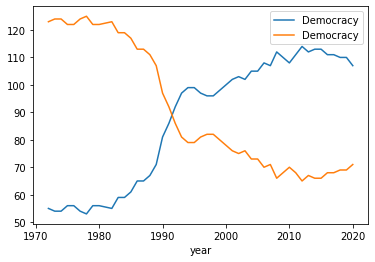

In [9]:
df_s.plot()
(df_c - df_s).plot()
plt.legend()

In [33]:
df.loc[:, 'diff_in_dem'] = df.groupby(['country']).Democracy.transform('diff')

<AxesSubplot:xlabel='year'>

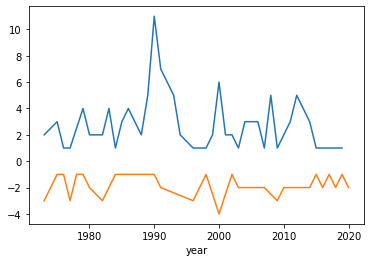

In [40]:
df[df.diff_in_dem == 1].groupby(['year']).diff_in_dem.sum().plot()
df[df.diff_in_dem == -1].groupby(['year']).diff_in_dem.sum().plot()

In [11]:
df.country.unique()

array(['algeria', 'argentina', 'armenia', 'azerbaijan', 'belarus',
       'benin', 'burkina faso', 'cameroon', 'chile', 'china', 'colombia',
       'costa rica', 'croatia', 'cuba', 'czech republic',
       'dominican republic', 'ecuador', 'el salvador', 'estonia',
       'georgia', 'ghana', 'hungary', 'india', 'indonesia', 'iraq',
       'kazakhstan', 'kenya', 'latvia', 'liberia', 'lithuania',
       'madagascar', 'malawi', 'mali', 'mauritania', 'mauritius',
       'mexico', 'moldova', 'mongolia', 'montenegro', 'mozambique',
       'namibia', 'nicaragua', 'niger', 'nigeria', 'pakistan', 'panama',
       'paraguay', 'peru', 'philippines', 'poland', 'rwanda', 'senegal',
       'serbia', 'singapore', 'slovenia', 'south africa', 'sri lanka',
       'sudan', 'togo', 'turkey', 'turkmenistan', 'ukraine', 'uruguay',
       'uzbekistan', 'zambia', 'zimbabwe'], dtype=object)